**Identificação**: BRENO ALAN ALVES MARQUES (2462286)

# [Domótica] Classificar as tarefas mais rotineiras de uma habitação
## Pré-processamento


### Iniciando DataSet 

* Carregando o DataSet

In [24]:
import pandas as pd
data_set_2021_8 = pd.read_csv('https://github.com/brolam/sbdia-projeto-I/raw/main/data/OHA-2021-8.csv')

* Exibir atributos do DataSet

In [25]:
data_set_2021_8.head()

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal
0,1,0,LateNight,Sunday,1627786806,14,163.01604,272.74854,0,435.76460
1,1,0,LateNight,Sunday,1627786820,14,155.36642,273.27606,0,428.64252
2,1,0,LateNight,Sunday,1627786834,14,155.10265,274.59497,0,429.69766
3,1,0,LateNight,Sunday,1627786848,14,156.15776,283.82730,0,439.98505
4,1,0,LateNight,Sunday,1627786862,14,157.74045,268.52805,0,426.26850


### Codificação de rótulo - as colunas PeriodOfDay e DayOfWeek passarão pelo processo de Codificação de rótulo

* Criar LabelEncoder para os atributos PeriodOfDay e DayOfWeek

In [26]:
from sklearn.preprocessing import LabelEncoder
from pickle import dump
encoder_period_of_day = LabelEncoder()
encoder_day_of_week = LabelEncoder()
encoder_period_of_day.fit(data_set_2021_8.PeriodOfDay.values)
encoder_day_of_week.fit(data_set_2021_8.DayOfWeek.values)

LabelEncoder()

* Salvar LabelEncoder

In [27]:
dump(encoder_period_of_day, open('encoder_period_of_day.pkl', 'wb'))
dump(encoder_day_of_week, open('encoder_day_of_week.pkl', 'wb'))

* Carregar LabelEncoder

In [28]:
from pickle import load

encoder_period_of_day = load(open('encoder_period_of_day.pkl', 'rb'))
encoder_day_of_week = load(open('encoder_day_of_week.pkl', 'rb'))

* Adicionar Codigos para as colunas PeriodOfDay e DayOfWeek

In [29]:
data_set_2021_8["PeriodOfDayCode"] = encoder_period_of_day.transform(data_set_2021_8.PeriodOfDay)
data_set_2021_8["DayOfWeekCode"] = encoder_day_of_week.transform(data_set_2021_8.DayOfWeek)

* Exibir DataSet com a adição das colunas de código para PeridOfDay e DayOfWeek

In [30]:
data_set_2021_8.head()

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode
0,1,0,LateNight,Sunday,1627786806,14,163.01604,272.74854,0,435.76460,2,3
1,1,0,LateNight,Sunday,1627786820,14,155.36642,273.27606,0,428.64252,2,3
2,1,0,LateNight,Sunday,1627786834,14,155.10265,274.59497,0,429.69766,2,3
3,1,0,LateNight,Sunday,1627786848,14,156.15776,283.82730,0,439.98505,2,3
4,1,0,LateNight,Sunday,1627786862,14,157.74045,268.52805,0,426.26850,2,3


* Normatizar os atibutos previsores

In [31]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler_data_set = StandardScaler()
scaler_data_set.fit(data_set_2021_8.loc[:,['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal']])
dump(data_set_2021_8, open('scaler_data_set.pkl', 'wb'))

* Aplicar o algoritimo KMeans para encontrar cinco padrões de consumo de energia 

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=100000)
X = scaler_data_set.transform(data_set_2021_8.loc[:,['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal']])
kmeans.fit(X)

KMeans(max_iter=100000, n_clusters=3)

* Salvar treinamento do KMeans

In [198]:
dump(kmeans, open('kmeans.pkl', 'wb'))

* Criar um código para cada classe de consumo encontrado pelo KMens

In [37]:
data_set_2021_8['EnergyUseClassCode'] = kmeans.predict(X)

* Exibir gráfico de Total de Watts Vs Períodos do dia Classifica por Consumo de Energia

No handles with labels found to put in legend.


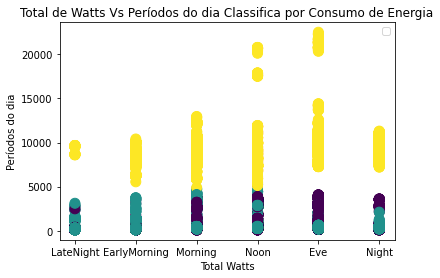

In [38]:
import matplotlib.pyplot as plt

plt.scatter(data_set_2021_8.PeriodOfDay, data_set_2021_8.WattsTotal, s = 100, c = kmeans.labels_)
plt.title('Total de Watts Vs Períodos do dia Classifica por Consumo de Energia')
plt.xlabel('Total Watts')
plt.ylabel('Períodos do dia')
plt.legend()

plt.show()

* Exibir exemplos de consumo de Energiar Classe Código Zero - Consumo Baixo

In [39]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 0]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
2314,1,9,Morning,Sunday,1627819203,14,61.196960,250.85478,0,312.05173,3,3,0
2315,1,9,Morning,Sunday,1627819217,14,62.779644,252.70123,0,315.48090,3,3,0
2316,1,9,Morning,Sunday,1627819231,14,59.878060,250.59100,0,310.46910,3,3,0
2317,1,9,Morning,Sunday,1627819245,14,57.504044,250.06343,0,307.56747,3,3,0
2318,1,9,Morning,Sunday,1627819259,14,57.767822,250.85478,0,308.62262,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152496,30,23,Night,Monday,1630378733,14,54.866238,227.90593,0,282.77216,4,1,0
152497,30,23,Night,Monday,1630378747,14,58.295383,225.79570,0,284.09106,4,1,0
152498,30,23,Night,Monday,1630378761,14,54.602460,222.63031,0,277.23276,4,1,0
152499,30,23,Night,Monday,1630378775,14,57.240260,221.31143,0,278.55170,4,1,0


* Exibir exemplos de consumo de Energiar Classe Código Um - Consumo Médio

In [40]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 1]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
0,1,0,LateNight,Sunday,1627786806,14,163.016040,272.74854,0,435.76460,2,3,1
1,1,0,LateNight,Sunday,1627786820,14,155.366420,273.27606,0,428.64252,2,3,1
2,1,0,LateNight,Sunday,1627786834,14,155.102650,274.59497,0,429.69766,2,3,1
3,1,0,LateNight,Sunday,1627786848,14,156.157760,283.82730,0,439.98505,2,3,1
4,1,0,LateNight,Sunday,1627786862,14,157.740450,268.52805,0,426.26850,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158457,31,23,Night,Tuesday,1630464207,15,82.299355,138.48450,0,220.78386,4,5,1
158458,31,23,Night,Tuesday,1630464221,14,83.354485,142.70497,0,226.05945,4,5,1
158459,31,23,Night,Tuesday,1630464235,14,82.299355,141.91365,0,224.21300,4,5,1
158460,31,23,Night,Tuesday,1630464249,14,82.563140,142.44121,0,225.00436,4,5,1


* Exibir exemplos de consumo de Energiar Classe Código Dois - Consumo Alto

In [41]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 2]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
3042,1,11,Morning,Sunday,1627829395,14,196.252320,10126.2510,0,10322.5030,3,3,2
3043,1,11,Morning,Sunday,1627829409,14,221.311430,10088.5290,0,10309.8420,3,3,2
3044,1,11,Morning,Sunday,1627829423,14,213.925570,10112.5340,0,10326.4590,3,3,2
3045,1,11,Morning,Sunday,1627829437,14,205.484620,10194.8330,0,10400.3180,3,3,2
3046,1,11,Morning,Sunday,1627829451,14,190.449160,10115.6990,0,10306.1480,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158523,31,23,Night,Tuesday,1630465131,14,108.149796,8050.8290,0,8158.9790,4,5,2
158524,31,23,Night,Tuesday,1630465145,14,92.059220,8134.7120,0,8226.7705,4,5,2
158525,31,23,Night,Tuesday,1630465159,14,105.512000,8074.8335,0,8180.3450,4,5,2
158526,31,23,Night,Tuesday,1630465173,14,108.677360,8099.6290,0,8208.3060,4,5,2


* Adicionar coluna com rotulo das classes de consumo de eneriga.

In [55]:
Energy_use_class_code_low = 0
Energy_use_class_code_medium = 1
Energy_use_class_code_High = 2 

def get_energy_use_class_title(energy_use_class_code):
  if energy_use_class_code == Energy_use_class_code_low:
    return "Low"
  elif energy_use_class_code == Energy_use_class_code_medium:
    return "Medium"
  else:
    return "High"

data_set_2021_8['EnergyUseClass'] = data_set_2021_8['EnergyUseClassCode'].apply(get_energy_use_class_title)


* Adicionar aributos de hábitos de consumo conforme a classes de consumo de energia 

In [191]:
def get_energy_consumption_habit(class_and_total_watts):
  if (class_and_total_watts[0] == Energy_use_class_code_low) and (class_and_total_watts[1]  < 180):
    return 0
  elif (class_and_total_watts[1] > 5000):
    return 1
  elif ((class_and_total_watts[0] == Energy_use_class_code_medium)) and (class_and_total_watts[1] > 600):
    return 2
  elif ( (class_and_total_watts[0] != Energy_use_class_code_low) and (class_and_total_watts[1] < 3000)) :
    return 3
  else:
    return 999

def get_energy_consumption_habit_title(energy_consumption_habit_code):
  if (energy_consumption_habit_code == 0 ):
    return 'Out of home'
  elif (energy_consumption_habit_code == 1):
    return 'Someone is taking a shower'
  elif (energy_consumption_habit_code == 2):
    return 'Someone is washing clothes'
  elif (energy_consumption_habit_code == 3):
    return 'Someone is cooking'
  else:
    return 'Undefined'

data_set_2021_8['EnergyConsumptionHabitCode'] = data_set_2021_8[['EnergyUseClassCode', 'WattsTotal']].apply(get_energy_consumption_habit, axis=1)
data_set_2021_8['EnergyConsumptionHabit'] = data_set_2021_8['EnergyConsumptionHabitCode'].apply(get_energy_consumption_habit_title)

* Criar e Exibir resultado do Pré-processamento do Dataset para divisão de treinamento e treinamento

In [192]:
data_set_for_train_test =  data_set_2021_8[['PeriodOfDayCode', 'PeriodOfDay',  'DayOfWeekCode', 'DayOfWeek', 'EnergyUseClassCode', 'WattsTotal', 'EnergyConsumptionHabitCode', 'EnergyConsumptionHabit' ]]
data_set_for_train_test

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabit
0,2,LateNight,3,Sunday,1,435.76460,3,Someone is cooking
1,2,LateNight,3,Sunday,1,428.64252,3,Someone is cooking
2,2,LateNight,3,Sunday,1,429.69766,3,Someone is cooking
3,2,LateNight,3,Sunday,1,439.98505,3,Someone is cooking
4,2,LateNight,3,Sunday,1,426.26850,3,Someone is cooking
...,...,...,...,...,...,...,...,...
158523,4,Night,5,Tuesday,2,8158.97900,1,Someone is taking a shower
158524,4,Night,5,Tuesday,2,8226.77050,1,Someone is taking a shower
158525,4,Night,5,Tuesday,2,8180.34500,1,Someone is taking a shower
158526,4,Night,5,Tuesday,2,8208.30600,1,Someone is taking a shower


* Criar Datasets de Treinamento e Testes dividindo a base em 80% para treinamento e 20% para testes por por Período de Dia, Dia da Semana e Hábito de Consumo:

In [193]:
from sklearn.model_selection import train_test_split

# Criar datasets vazios de treinamento e testes:
data_set_for_train = data_set_for_train_test.iloc[0:0]
data_set_for_test = data_set_for_train_test.iloc[0:0]

# Coletar e alimentar os datasets de treinamento e testes por Período de Dia, Dia da Semana e Hábito de Consumo 
for period_of_day in ['LateNight', 'EarlyMorning', 'Morning', 'Noon', 'Eve', 'Night' ]:
  for day_of_week in ['Sunday', 'Monday', 'Tuesday' 'Wednesday', 'Thursday', 'Friday', 'Saturday' ]:
    for energy_consumption_habit in ['Undefined', 'Out of home', 'Someone is taking a shower', 'Someone is washing clothes', 'Someone is cooking']:
      data_set_filtered = data_set_for_train_test.query(f"PeriodOfDay == '{period_of_day}' &  DayOfWeek == '{day_of_week}' & EnergyConsumptionHabit == '{energy_consumption_habit}'")
      if ( len(data_set_filtered) >= 10):
        train, test = train_test_split(data_set_filtered, train_size=0.8)
        data_set_for_train = data_set_for_train.append(train)
        data_set_for_test = data_set_for_test.append(test)
       

* Exibir quantidade de exemplos para o treinamento

In [194]:
data_set_for_train.groupby('EnergyConsumptionHabit').count()

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode
EnergyConsumptionHabit,,,,,,,
Out of home,11096,11096,11096,11096,11096,11096,11096
Someone is cooking,23586,23586,23586,23586,23586,23586,23586
Someone is taking a shower,3647,3647,3647,3647,3647,3647,3647
Someone is washing clothes,1066,1066,1066,1066,1066,1066,1066
Undefined,45056,45056,45056,45056,45056,45056,45056


* Exibir quantidade de exemplos para os testes

In [195]:
data_set_for_test.groupby('EnergyConsumptionHabit').count()

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode
EnergyConsumptionHabit,,,,,,,
Out of home,2783,2783,2783,2783,2783,2783,2783
Someone is cooking,5901,5901,5901,5901,5901,5901,5901
Someone is taking a shower,923,923,923,923,923,923,923
Someone is washing clothes,270,270,270,270,270,270,270
Undefined,11279,11279,11279,11279,11279,11279,11279


* Salvar Datasets de Treinamento e tests

In [197]:
data_set_for_train.to_csv('data_set_for_train.csv')
data_set_for_test.to_csv('data_set_for_test.csv')